In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import payments_manager as pm
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import itertools # Importando itertools para generar combinaciones de columnas
# Importando la función seasonal_decompose para la descomposición de series temporales
from statsmodels.tsa.seasonal import seasonal_decompose
#pm.help()
#pm.reset()
pm.init() #debug=True)
cr_cp = pm.df('cr_cp')
fe_cp = pm.df('fe_cp')
#cr_cp.info()
#fe_cp.info()

df_jo = pm.df('df_jo')
df_jall = pm.df('df_jall')
#df_jo.info()
#df_jall.info()

#df = pm.sort("df_jo", ["id_cr"]).reset_index()
#df = df.drop(columns=['index'])
#df_jo = df_jo.drop(columns=['Mes_created_at'])
#df_jo_cp = df.copy()
#display(df_jo_cp)

In [19]:
df = pm.df('df_jall')
#display(df)
#display(df[~df.Mes_created_at.isna()])
#df.info()
df['to_recive'] = df.cash_request_received_date-df.created_at
df['to_reimbur'] = df.reimbursement_date-df.created_at
df['to_end'] = df.reimbursement_date-df.money_back_date
df['to_send'] = df.send_at-df.created_at

cr_id = ['id_cr','id_y','user_id','amount','fee','stat_cr','stat_fe','transfer_type','type',
            'to_recive','to_reimbur','to_end','to_send',
            'created_at','reimbursement_date','cash_request_received_date','send_at','money_back_date',
            'paid_at','charge_moment','moderated_at'] # ,'from_date','to_date','reason','recovery_status'


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32094 entries, 0 to 32093
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   id_cr                       32094 non-null  int64          
 1   amount                      32094 non-null  float64        
 2   stat_cr                     32094 non-null  object         
 3   created_at                  32094 non-null  datetime64[ns] 
 4   updated_at_x                32094 non-null  datetime64[ns] 
 5   user_id                     32094 non-null  int64          
 6   active                      32094 non-null  int64          
 7   moderated_at                21759 non-null  datetime64[ns] 
 8   reimbursement_date          32094 non-null  datetime64[ns] 
 9   cash_request_received_date  24149 non-null  datetime64[ns] 
 10  money_back_date             23917 non-null  datetime64[ns] 
 11  transfer_type               32094 non-nul

Matriz correlación (Pearson) para variables numéricas del df_jall

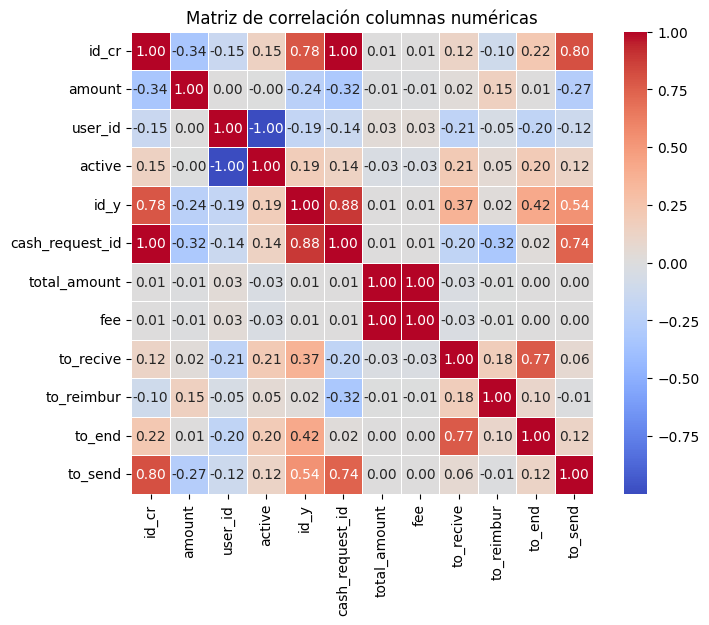

In [20]:
df_corr = df.select_dtypes(include=['number'])  # Mantiene solo columnas numéricas
matriz_corr = df_corr.corr()

plt.figure(figsize=(8, 6)) 
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Matriz de correlación columnas numéricas')
plt.show()

Matriz de correlacion (Pearson) para variables numericas del df_jo

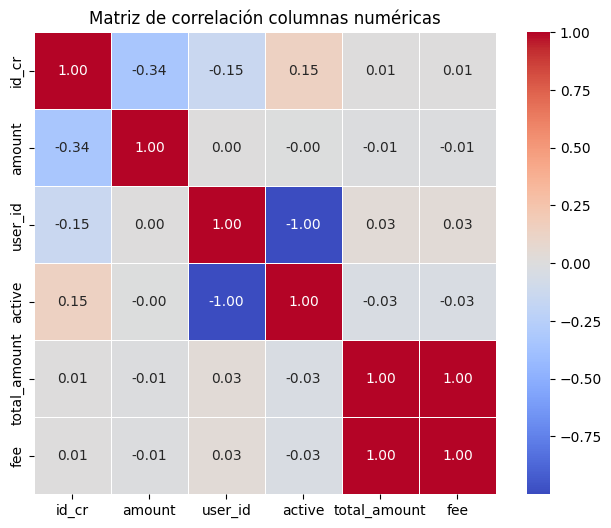

In [21]:
df_corr2 = df_jo.select_dtypes(include=['number'])  # Mantiene solo columnas numéricas
matriz_corr2 = df_corr2.corr()

plt.figure(figsize=(8, 6)) 
sns.heatmap(matriz_corr2, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Matriz de correlación columnas numéricas')
plt.show()

No sabemos si la relación es lineal por lo tanto esto no sabemos si tiene sentido